<a href="https://colab.research.google.com/github/JayShekhavat/Image-Classification-Project-CNN-/blob/main/AI_(CNN)Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import some libraries and algorithms**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


##**Download mnist dataset by using tf.keras and reshape data**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


##**Make a function to show images and labels of each images**

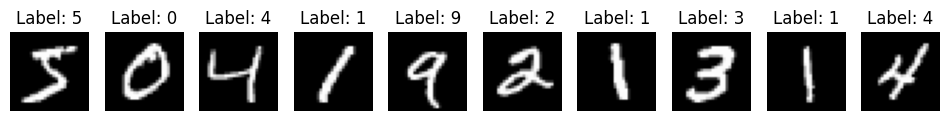

In [ ]:
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(12, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

plot_images(x_train, y_train, num_images=10)

##**Make a model by using Sequential method and add layers in Sequentially with algorithms**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8957 - loss: 0.3536 - val_accuracy: 0.9828 - val_loss: 0.0571
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9822 - loss: 0.0548 - val_accuracy: 0.9865 - val_loss: 0.0443
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9883 - val_loss: 0.0370
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9859 - val_loss: 0.0485
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9885 - val_loss: 0.0378


##**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 4s - 11ms/step - accuracy: 0.9883 - loss: 0.0400
Test accuracy: 0.9883000254631042


##**Plot accuracy between Accuracy and validation accuracy**

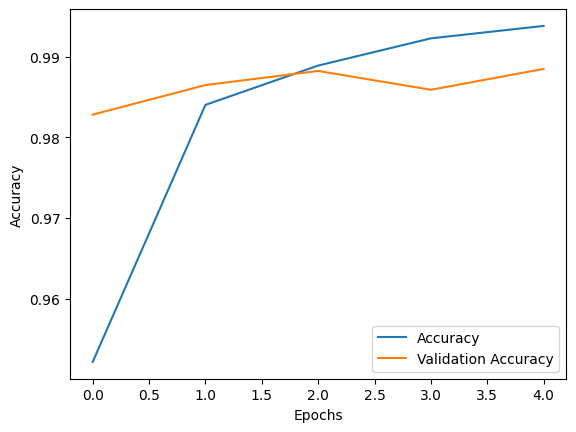

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


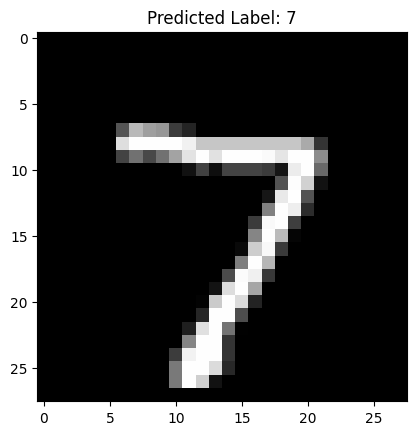

In [ ]:
import numpy as np
index = 0
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[index])}")
plt.show()


##**Conclusion**

###In this CNN project, I used layers and models method and download mnist dataset from the website. Accuracy of this algorithm is 0.9883.  